# ML HW 04

## >> 201711192 Choi Hyuk

In [321]:
import numpy as np

from keras.datasets import mnist

from keras.datasets import mnist

(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_validation = X_validation.reshape(X_validation.shape[0], 784).astype(
    'float64') / 255

print (X_train.shape, Y_train.shape)

(60000, 784) (60000,)


In [0]:
# choide the sample in mnist dataset
def choice_sample(data, labels):
    temp = []
    samples_data = []
    samples_label = []
    for i in range(len(labels)):
        temp.append([data[i], labels[i]])
    random.shuffle(temp)
    for i in range(10):
        k = 0
        for j in range(len(temp)):
            if k >= 100:
                break
            if temp[j][1] == i:
                samples_data.append(temp[j][0])
                samples_label.append(temp[j][1])
                k += 1
    return np.array(samples_data), np.array(samples_label)

In [323]:
(samples_data,samples_label) = choice_sample(X_train,Y_train)
samples_data.shape, samples_label.shape

((1000, 784), (1000,))


## (1) Implement a function to perform PCA on a group of images. Input the number of dimensions k you
want to estimate and output the set of eigenvectors and their corresponding eigenvalues (for the largest k).

In [0]:
# return the eigenvalue and eigenvector for evaluation
def eigen_decomp_PCA(X, k):
    X_cen = X - X.mean(axis=0)
    X_cov = np.dot(X_cen.T, X_cen) / (X.shape[0]-1)
    
    eigenval, eigenvec = np.linalg.eig(X_cov)

    return eigenval[:k], eigenvec[:, :k]

In [0]:
w,v = eigen_decomp_PCA(samples_data, 3)

In [326]:
print('eigenvalues :', w)

eigenvalues : [5.14001197+0.j 3.62969065+0.j 3.34728019+0.j]


In [327]:
print('eigenvectors :', v)

eigenvectors : [[0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]


In [328]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.424199+0.j 0.299554+0.j 0.276247+0.j]


In [0]:
from sklearn.decomposition import PCA

In [0]:
# using sklearn
def eigen_PCA(X, k):
    pca = PCA(n_components = k)
    pca.fit(X)
    
    return pca.explained_variance_, pca.components_.T

In [331]:
print('eigen values :', eigen_PCA(samples_data,3)[0])
print('eigen vectors :\n', eigen_PCA(samples_data,3)[1])

eigen values : [5.14001197 3.62969064 3.34728017]
eigen vectors :
 [[ 8.00996712e-18  1.21322636e-16  5.38552720e-17]
 [-1.30591464e-18 -2.39258369e-17 -1.31199398e-16]
 [ 1.50673906e-19  5.39270910e-18  1.59865056e-17]
 ...
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00]]


In [332]:
print('explained variance ratio :', pca.explained_variance_ratio_)

explained variance ratio : [0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725898 0.01685758 0.01576077 0.01494562 0.01302506 0.01278467
 0.01180118 0.011483   0.0106641  0.01027178 0.00979715 0.00901867
 0.00888231 0.00826573 0.00799743 0.00765838 0.00717514 0.00687256
 0.00649144 0.00627159 0.00590284 0.00581759 0.00544738 0.00541655
 0.00507243 0.00481121 0.00460166 0.00451523 0.00437027 0.00424364
 0.00412964 0.00389631 0.00378241 0.0037046  0.00358284 0.00331726
 0.00326815 0.00311841 0.00304067 0.00297837 0.00288485 0.00278698
 0.00273018 0.00262961 0.00254961 0.00253009 0.00244545 0.0024144
 0.00234353 0.00233333 0.00223062 0.00215517 0.00208806 0.00202298
 0.00199505 0.00188553 0.00187169 0.00185633 0.00180538 0.00174301
 0.0017034  0.0016418  0.00164    0.00157225 0.00154452 0.00148071
 0.0014249  0.0013849  0.00137474 0.00133762 0.00130997 0.00130872
 0.00128984 0.00124687 0.00121721 0.

## (2) Run the PCA function to compute the Digit-2-Space (100 images used in Assignment 3). Plot the mean image and the first 10 eigenvectors (as images). Plot the eigenvalues (in decreasing order) as a function of dimension (for the first 100 dimensions). Describe what you find in both plots.

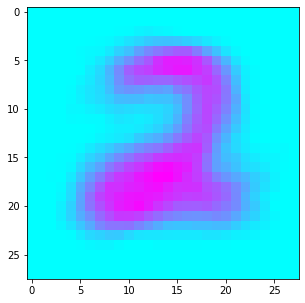

In [333]:
# Plot the mean image of digit 2 data samples
pca = PCA(n_components=100)
X_projection = pca.fit_transform(samples_data[200:300])
X_recover = pca.inverse_transform(X_projection)
mean_image = pca.mean_
plt.figure(figsize=(20,5))
plt.imshow(np.reshape(mean_image, (28,28)), cmap=plt.cm.cool)

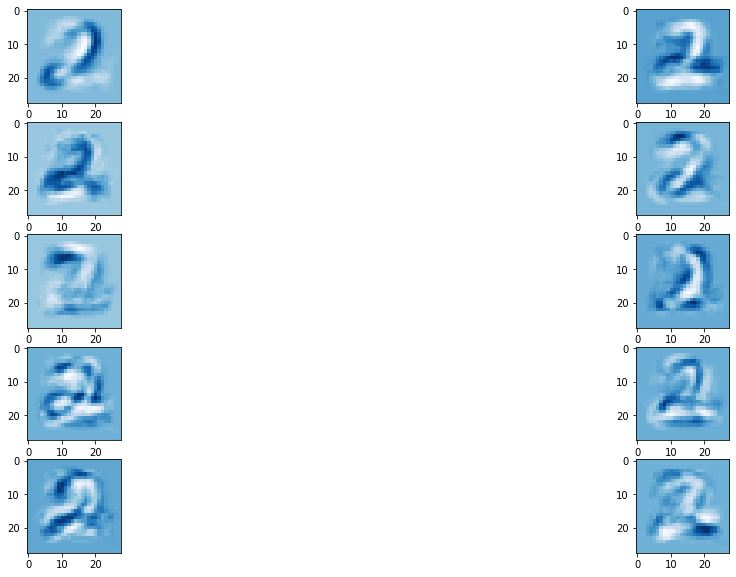

In [334]:
#  Plot the  first 10 eigenvectors

fig = plt.figure(figsize = (20,10))
for i in range(10):
        eigfig = fig.add_subplot(5, 2, i+1)
        eigfig.imshow(pca.components_[i].reshape(28, 28), cmap=plt.cm.Blues)
        eigfig.grid(False)

plt.show()

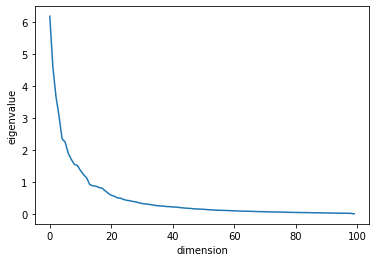

In [335]:
# plot the dimension - eigenvalue graph
plt.plot(range(100), list(pca.explained_variance_))
plt.xlabel('dimension')
plt.ylabel('eigenvalue')
plt.show()

## (3) Run the PCA function to all 1000 images used in Assignment 3. Plot the mean image and the first 10 eigenvectors (as images). Plot the eigenvalues (in decreasing order) as a function of dimension (for the first 100 dimensions). Describe what you find in both plots. Compare these plots to the ones you created in (2) and (3)

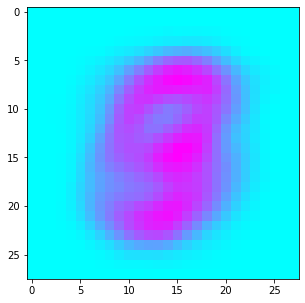

In [336]:
# Run the PCA function to all 1000 images used in Assignment 3. Plot the mean image
pca = PCA(n_components=100)
X_projection = pca.fit_transform(samples_data)
X_recover = pca.inverse_transform(X_projection)
mean_image = pca.mean_
plt.figure(figsize=(20,5))
plt.imshow(np.reshape(mean_image, (28,28)), cmap=plt.cm.cool)

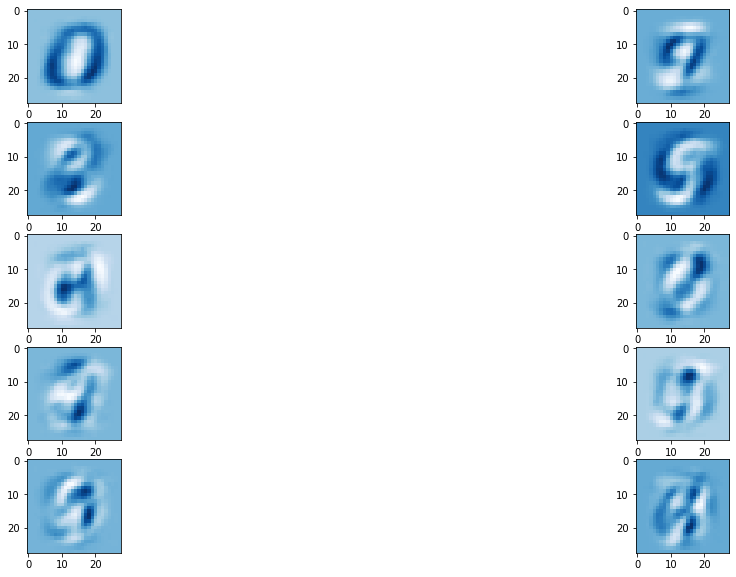

In [337]:
#  Plot the  first 10 eigenvectors

fig = plt.figure(figsize = (20,10))
for i in range(10):
        eigfig = fig.add_subplot(5, 2, i+1)
        eigfig.imshow(pca.components_[i].reshape(28, 28), cmap=plt.cm.Blues)
        eigfig.grid(False)

plt.show()

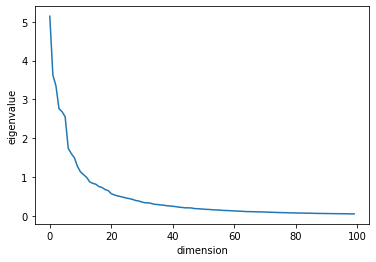

In [338]:
# plot the dimension - eigenvalue graph
plt.plot(range(100), list(pca.explained_variance_))
plt.xlabel('dimension')
plt.ylabel('eigenvalue')
plt.show()

(2)와 비교해서, (2)에서는 label이 2인 data들만 가지고 pca를 진행하였고 (3)에서는 모든 dataset을 사용하였다. 결과적으로는 eigenvector 10개를 선정해 visualize한 이미지로도 알 수 있듯이 data들을 구분하는 주 성분이 확연하게 다르다는 것을 알 수 있다. (3)에서의 Principal component가 조금 더 광범위함을 알 수있었고, 그에 따른 첫 eigenvector의 eigenvalue가 (3)에서 더 낮아짐을 알 수 있었다.

## (4) Use the nearest-neighbor classifier to classify the MNIST test data set in the PCA space. Provide accuracy. Explain your findings.

In [339]:
X_validation.shape

(10000, 784)

In [340]:
X_projection_test = pca.fit_transform(X_validation)
X_projection_test.shape

(10000, 100)

In [341]:
X_projection.shape, samples_label.shape

((1000, 100), (1000,))

In [352]:
X_projection_test.shape

(10000, 100)

In [358]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=5)
KNNClassifier.fit(X_projection, samples_label)
acc = KNNClassifier.score(X_projection_test, Y_validation.astype(float))

print('Accuracy for n = 5 :',acc)

KNNClassifier = KNeighborsClassifier(n_neighbors=4)
KNNClassifier.fit(X_projection, samples_label)
acc = KNNClassifier.score(X_projection_test, Y_validation.astype(float))

print('Accuracy for n = 4 :',acc)

KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_projection, samples_label)
acc = KNNClassifier.score(X_projection_test, Y_validation.astype(float))

print('Accuracy for n = 3 :',acc)

Accuracy for n = 5 : 0.1478
Accuracy for n = 4 : 0.1485
Accuracy for n = 3 : 0.1481


## (5) Make a figure that shows 3 correctly classified and 3 incorrectly classified images for each class. Explain your findings.

In [0]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

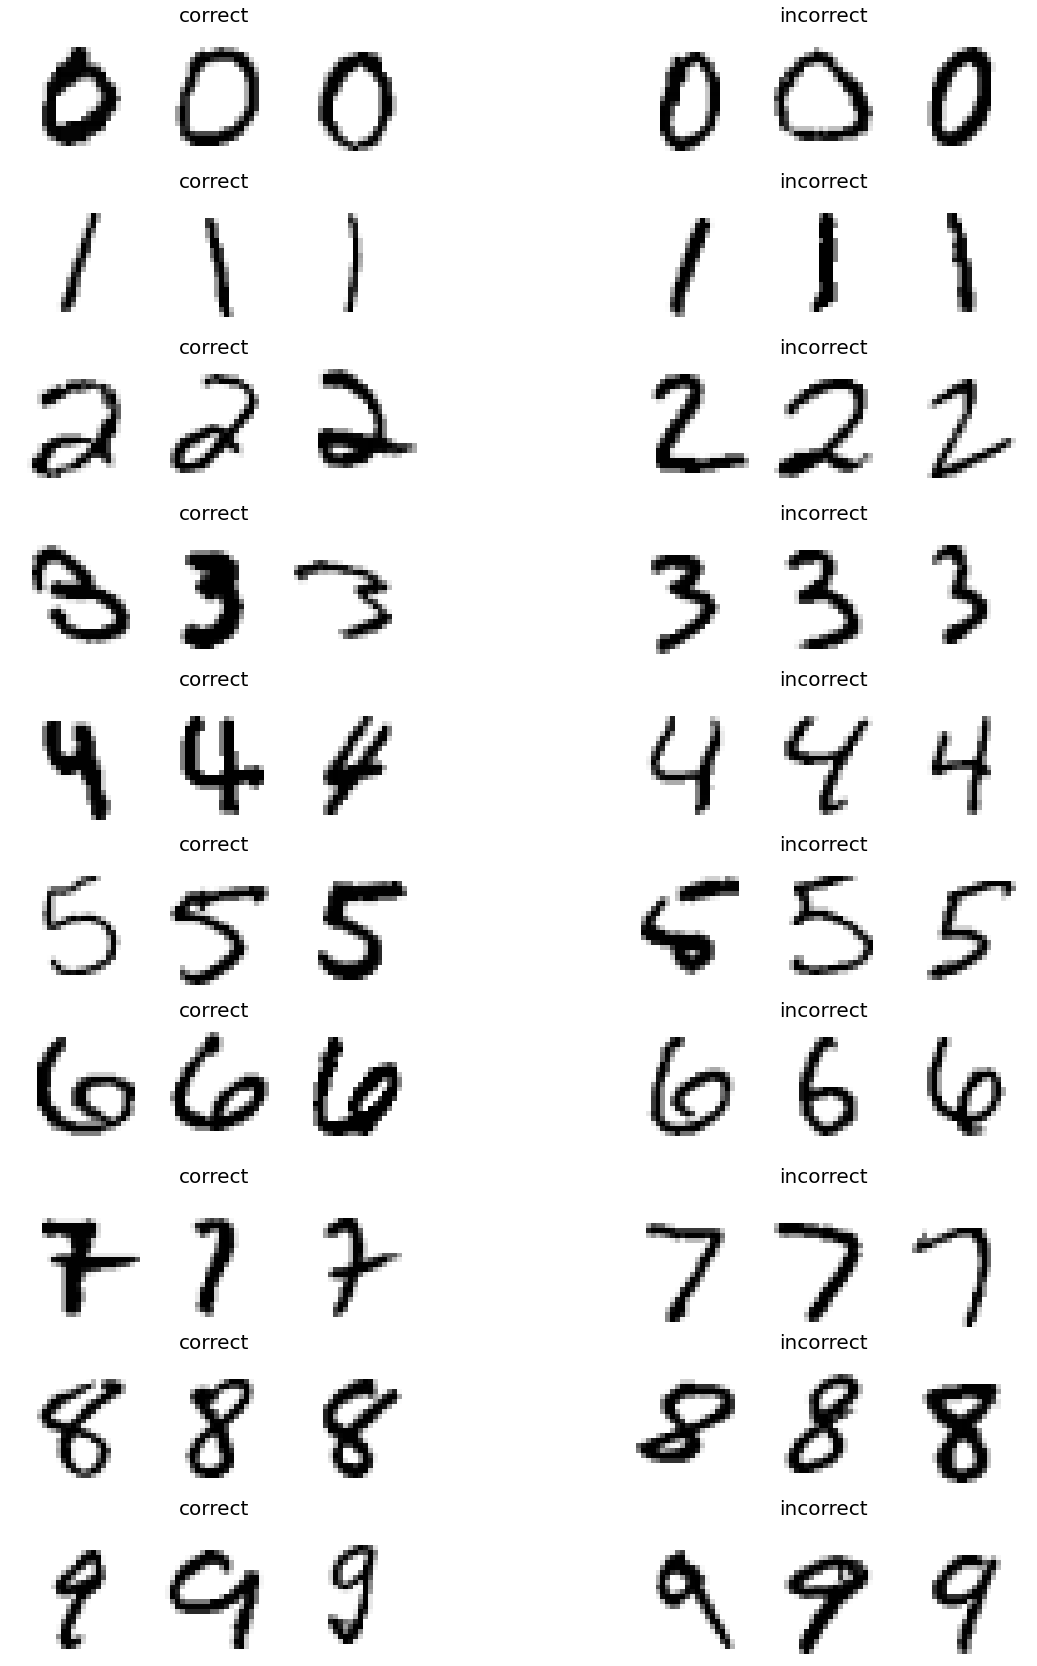

In [383]:
import matplotlib

KNNClassifier = KNeighborsClassifier(n_neighbors=4)
KNNClassifier.fit(X_projection, samples_label)
acc = KNNClassifier.score(X_projection_test, Y_validation.astype(float))
predict = KNNClassifier.predict(X_projection_test)

plt.figure(figsize=(20, 30))
for digit in range(10):
    corrects = []
    incorrects = []
    for i in range(len(Y_validation)):
        if Y_validation[i] == predict[i] and Y_validation[i] == digit:
            corrects.append(X_validation[i])
        if len(corrects) == 3:
            corrects = np.array(corrects)
            break
    for i in range(len(Y_validation)):
        if Y_validation[i] != predict[i] and Y_validation[i] == digit:
            incorrects.append(X_validation[i])
        if len(incorrects) == 3:
            incorrects = np.array(incorrects)
            break

    plt.subplot(10,2,2*digit+1)
    plot_digits(corrects)
    plt.title("correct",fontsize=20)
    plt.subplot(10,2,2*digit+2)
    plot_digits(incorrects)
    plt.title("incorrect", fontsize=20)



(4)의 KNN의 경우 상당한 시간을 소요하여 비교했어야 하므로 neighborhood의 수만 조절해보면서 accuracy를 진행하였다. 하지만 accuracy는 대체적으로 낮았고, 이는 내가 많은 MNIST Data를 가지고 진행하였기 때문이라고 결론내렸다. 대체적으로 많은 Label을 지니고 있었고 Classify 되는 경우가 10가지나 존재하였기 때문에 Accuracy가 낮았다.

(5)의경우 몇몇 case들을 보면 (3)에서 나타난 10 eigenvector들의 그림의 특성이 잘 드러난 부분들이 있다. correct와 incorrect한 차이를 잘보면, (3)에 나온 figure들의 특성들을 가지고 있지 않다는 것을 특정 label에서 관찰 할 수 있었다.